# Selección de Modelos

## Métricas de Selección

In [36]:
install.packages('olsrr')

Installing package into 'C:/Users/alexi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'nortest'




package 'nortest' successfully unpacked and MD5 sums checked
package 'olsrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alexi\AppData\Local\Temp\RtmpyWJhJY\downloaded_packages


In [37]:
# library(ggplot2)
# library(GGally)
library(olsrr)
library(leaps)

Warning message:
"package 'olsrr' was built under R version 4.4.3"

Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers




In [16]:
DatasetCemento <- read.table('./cement.txt',header = T,skip=5)
DatasetCemento

y,x1,x2,x3,x4
<dbl>,<int>,<int>,<int>,<int>
78.5,7,26,6,60
74.3,1,29,15,52
104.3,11,56,8,20
87.6,11,31,8,47
95.9,7,52,6,33
109.2,11,55,9,22
102.7,3,71,17,6
72.5,1,31,22,44
93.1,2,54,18,22


In [20]:
LinearModel_Completo <- lm(y ~ .,DatasetCemento, x=TRUE,y=TRUE)

In [23]:
results <- leaps(LinearModel_Completo$x,DatasetCemento$y,int=FALSE)

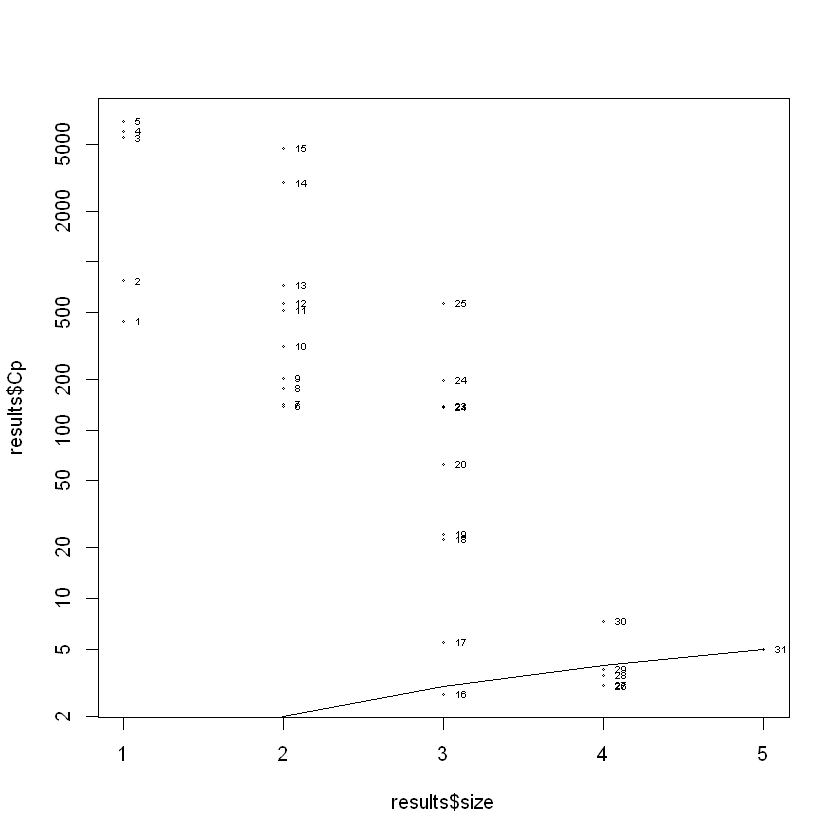

In [28]:
plot(results$size,results$Cp,log='y',cex=0.3)
lines(results$size,results$size)
text(results$size,results$Cp,cex=0.5,pos=4)

In [30]:
idx_best_rule <- which.min(abs(reults$Cp - reults$size))
idx_best_rule

[1] 31

In [31]:
noms_x <- colnames(LinearModel_Completo$x)

In [33]:
vars_rule <- noms_x[results$which[idx_best_rule,]]
vars_rule 

[1] "(Intercept)" "x1"          "x2"          "x3"          "x4"

[[1]]
NULL

[[2]]
NULL


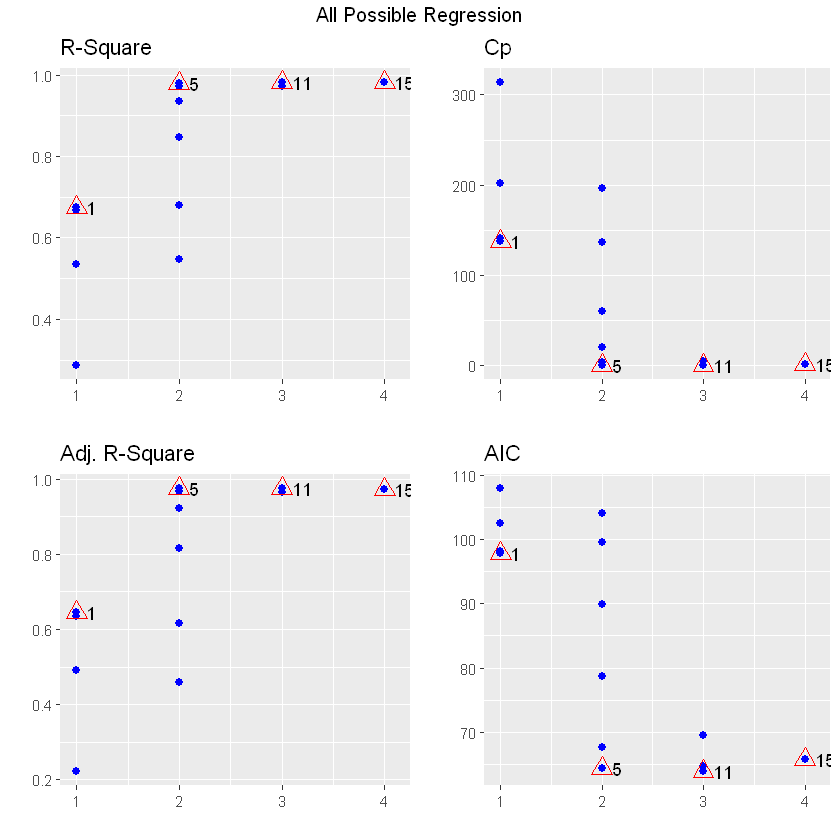

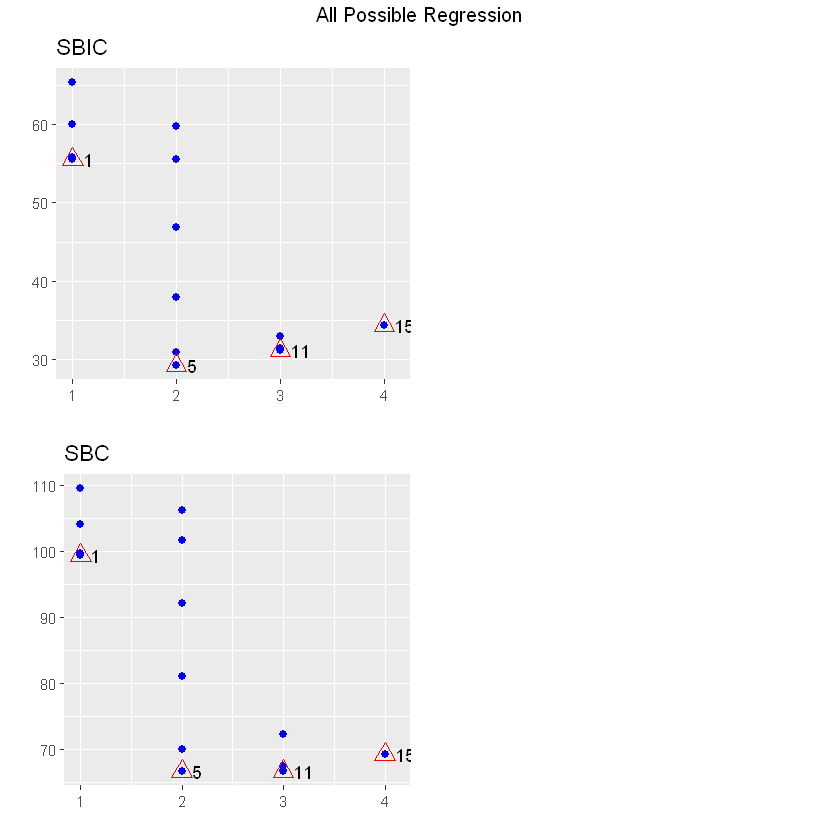

In [40]:
results_2 <- ols_step_all_possible(LinearModel_Completo)
plot(results_2)

In [41]:
results_2

   Index N  Predictors  R-Square Adj. R-Square Mallow's Cp
4      1 1          x4 0.6745420     0.6449549  138.730833
2      2 1          x2 0.6662683     0.6359290  142.486407
1      3 1          x1 0.5339480     0.4915797  202.548769
3      4 1          x3 0.2858727     0.2209521  315.154284
5      5 2       x1 x2 0.9786784     0.9744140    2.678242
7      6 2       x1 x4 0.9724710     0.9669653    5.495851
10     7 2       x3 x4 0.9352896     0.9223476   22.373112
8      8 2       x2 x3 0.8470254     0.8164305   62.437716
9      9 2       x2 x4 0.6800604     0.6160725  138.225920
6     10 2       x1 x3 0.5481667     0.4578001  198.094653
12    11 3    x1 x2 x4 0.9823355     0.9764473    3.018233
11    12 3    x1 x2 x3 0.9822847     0.9763796    3.041280
13    13 3    x1 x3 x4 0.9812811     0.9750415    3.496824
14    14 3    x2 x3 x4 0.9728200     0.9637599    7.337474
15    15 4 x1 x2 x3 x4 0.9823756     0.9735634    5.000000

## Selección Paso a Paso

In [46]:
library(MASS)
datasets::swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0


In [45]:
ModeloCompleto <- lm(Fertility ~ . , swiss)

summary(ModeloCompleto)


Call:
lm(formula = Fertility ~ ., data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2743  -5.2617   0.5032   4.1198  15.3213 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.165 on 41 degrees of freedom
Multiple R-squared:  0.7067,	Adjusted R-squared:  0.671 
F-statistic: 19.76 on 5 and 41 DF,  p-value: 5.594e-10


In [ ]:
modelo_stepwise <- stepAIC(ModeloCompleto,direction = 'both',trace = TRUE)

Start:  AIC=190.69
Fertility ~ Agriculture + Examination + Education + Catholic + 
    Infant.Mortality

                   Df Sum of Sq    RSS    AIC
- Examination       1     53.03 2158.1 189.86
<none>                          2105.0 190.69
- Agriculture       1    307.72 2412.8 195.10
- Infant.Mortality  1    408.75 2513.8 197.03
- Catholic          1    447.71 2552.8 197.75
- Education         1   1162.56 3267.6 209.36

Step:  AIC=189.86
Fertility ~ Agriculture + Education + Catholic + Infant.Mortality

                   Df Sum of Sq    RSS    AIC
<none>                          2158.1 189.86
+ Examination       1     53.03 2105.0 190.69
- Agriculture       1    264.18 2422.2 193.29
- Infant.Mortality  1    409.81 2567.9 196.03
- Catholic          1    956.57 3114.6 205.10
- Education         1   2249.97 4408.0 221.43


In [ ]:
summary(modelo_stepwise)


Call:
lm(formula = Fertility ~ Agriculture + Education + Catholic + 
    Infant.Mortality, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6765  -6.0522   0.7514   3.1664  16.1422 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.10131    9.60489   6.466 8.49e-08 ***
Agriculture      -0.15462    0.06819  -2.267  0.02857 *  
Education        -0.98026    0.14814  -6.617 5.14e-08 ***
Catholic          0.12467    0.02889   4.315 9.50e-05 ***
Infant.Mortality  1.07844    0.38187   2.824  0.00722 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.168 on 42 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.6707 
F-statistic: 24.42 on 4 and 42 DF,  p-value: 1.717e-10
